### Bulk LRP Plot Making

In [1]:
%matplotlib inline
##so-called "math" related imports
from netCDF4 import Dataset as ncread
import numpy as np
from scipy.io import loadmat
import pandas as pd
import h5py
import math
from random import seed
from random import randint
from random import sample
from scipy.ndimage import gaussian_filter
from sklearn.metrics import brier_score_loss
import xarray as xr

import pickle

#plotting related imports
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors

/tmp/ipykernel_393009/1788017833.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#import statements for the clustering-related portions
from sklearn.cluster import KMeans as km

In [6]:
##true values
infile = open("PVU100_neg90_LRP.p", 'rb')
neg90_LRP = pickle.load(infile)
infile.close()

infile = open("PVU100_pos90_LRP.p",'rb')
pos90_LRP = pickle.load(infile)
infile.close()

##false values
infile = open("PVU100_Fneg90_LRP.p",'rb')
Fneg90_LRP = pickle.load(infile)
infile.close()

infile = open("PVU100_Fpos90_LRP.p",'rb')
Fpos90_LRP = pickle.load(infile)
infile.close()

##for composites
infile = open("PVU100_comp_pos.p",'rb')
comp_pos = pickle.load(infile)
infile.close()

infile = open("PVU100_compFpos.p",'rb')
compFpos = pickle.load(infile)
infile.close()

infile = open("PVU100_comp_neg.p",'rb')
comp_neg = pickle.load(infile)
infile.close()

infile = open("PVU100_compFneg.p",'rb')
compFneg = pickle.load(infile)
infile.close()

### Start with LRP code.

In [7]:
#lat
lats = np.arange(90, 62.5, -2.5)
#lon
lons = np.arange(0, 362.5, 2.5)

<Figure size 750x750 with 0 Axes>

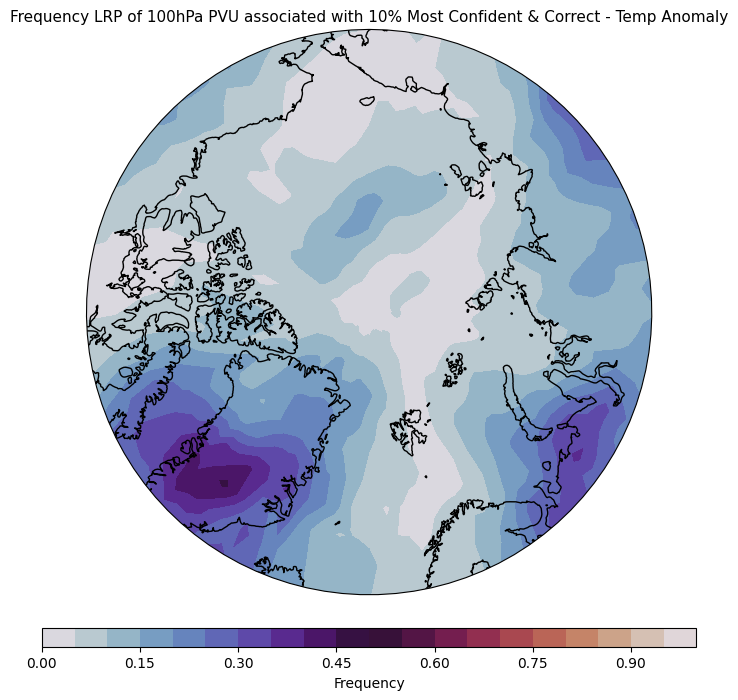

In [8]:
# plot the Correct Negative
color = 'twilight' 
colorbarMin = 0
colorbarMax = 1
colorspace = 0.05
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats,np.nanmean(neg90_LRP,axis=0),level,transform=ccrs.PlateCarree(), cmap=color)
plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="Frequency")

plt.tight_layout()
title = 'Frequency LRP of 100hPa PVU associated with 10% Most Confident & Correct - Temp Anomaly'
plt.title(title,fontsize=11)
plt.savefig("1204_PVU100Neg_LRP_lag.png", bbox_inches='tight', dpi = 150)
plt.show()

<Figure size 750x750 with 0 Axes>

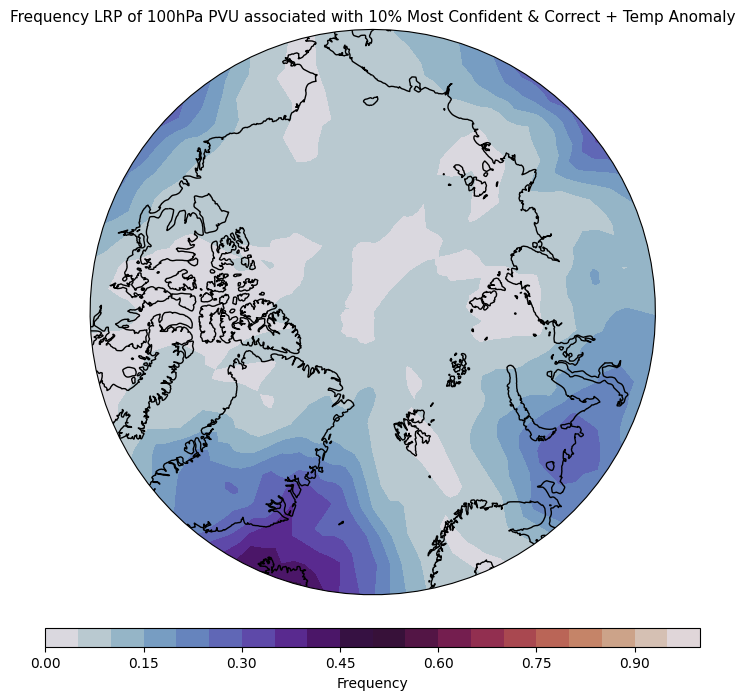

In [10]:
# plot the Correct Po
color = 'twilight' 
colorbarMin = 0
colorbarMax = 1
colorspace = 0.05
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats,np.nanmean(pos90_LRP,axis=0),level,transform=ccrs.PlateCarree(), cmap=color)
plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="Frequency")

plt.tight_layout()
title = 'Frequency LRP of 100hPa PVU associated with 10% Most Confident & Correct + Temp Anomaly'
plt.title(title,fontsize=11)
plt.savefig("1204_PVU100Pos_LRP_lag.png", bbox_inches='tight', dpi = 150)
plt.show()

<Figure size 750x750 with 0 Axes>

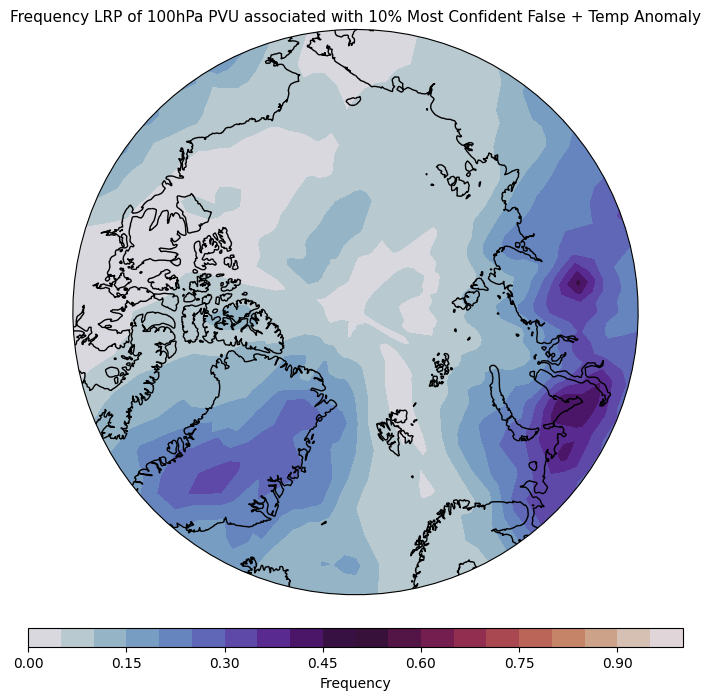

In [11]:
# plot the False Positive 
color = 'twilight' 
colorbarMin = 0
colorbarMax = 1
colorspace = 0.05
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats,np.nanmean(Fpos90_LRP,axis=0),level,transform=ccrs.PlateCarree(), cmap=color)
plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="Frequency")

plt.tight_layout()
title = 'Frequency LRP of 100hPa PVU associated with 10% Most Confident False + Temp Anomaly'
plt.title(title,fontsize=11)
plt.savefig("1204_PVU100FPos_LRP_lag.png", bbox_inches='tight', dpi = 150)
plt.show()

<Figure size 750x750 with 0 Axes>

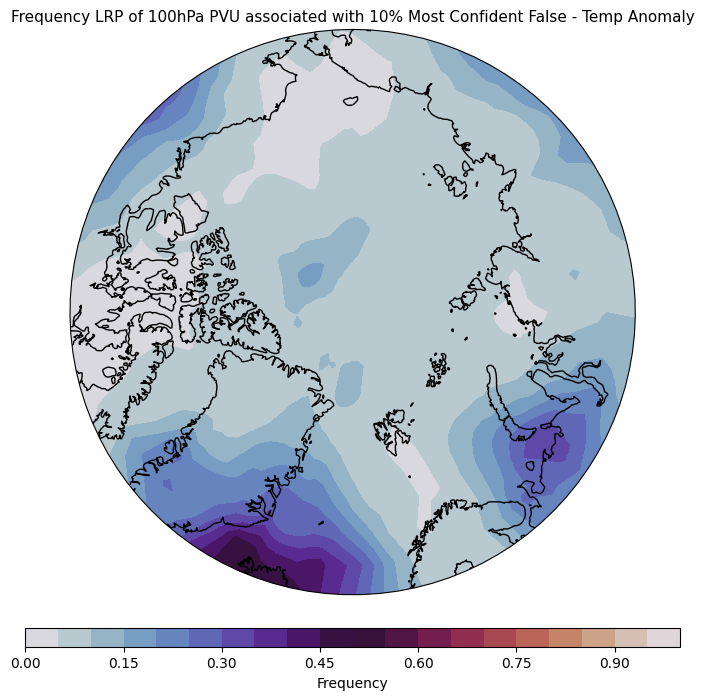

In [12]:
# plot the False Negative
color = 'twilight' 
colorbarMin = 0
colorbarMax = 1
colorspace = 0.05
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats,np.nanmean(Fneg90_LRP,axis=0),level,transform=ccrs.PlateCarree(), cmap=color)
plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="Frequency")

plt.tight_layout()
title = 'Frequency LRP of 100hPa PVU associated with 10% Most Confident False - Temp Anomaly'
plt.title(title,fontsize=11)
plt.savefig("1204_PVU100FNeg_LRP_lag.png", bbox_inches='tight', dpi = 150)
plt.show()

### Now make composite pv anomaly plots. 

In [13]:
#lat
lats = np.arange(90, 62.5, -2.5)
#lon
lons = np.arange(0, 362.5, 2.5)

In [14]:
##reshape comp arrays
cpos = comp_pos.reshape(100,11,145)
cneg = comp_neg.reshape(100,11,145)
cFpos = compFpos.reshape(100,11,145)
cFneg = compFneg.reshape(100,11,145)

cFneg.shape

(100, 11, 145)

In [15]:
pos_neg = cneg - cpos
pos_neg.shape

(100, 11, 145)

<Figure size 750x750 with 0 Axes>

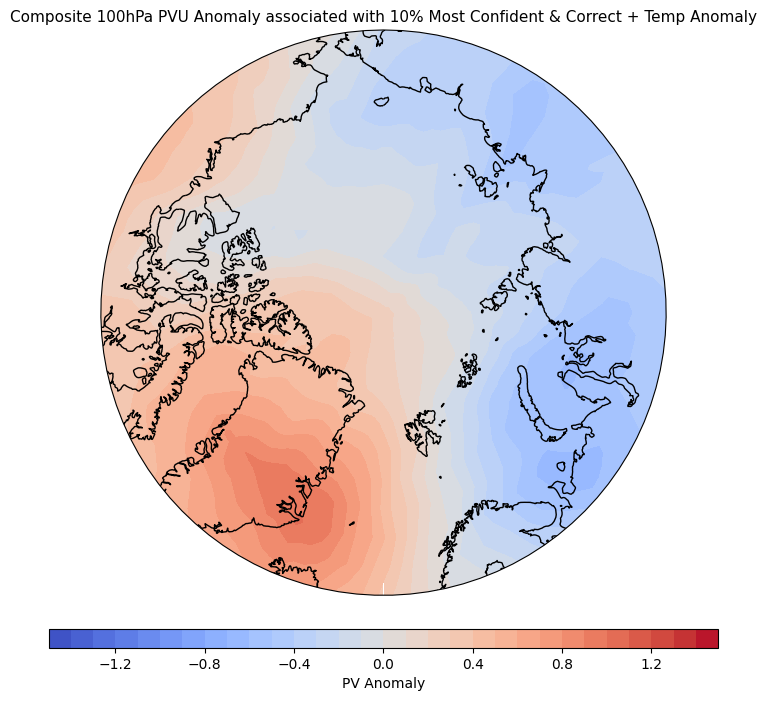

In [18]:
# plot the Correct Positive Composite
color = 'coolwarm' 
colorbarMin = -1.5
colorbarMax = 1.5
colorspace = 0.1
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats,np.nanmean(cpos,axis=0), level, transform=ccrs.PlateCarree(), cmap=color)
plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="PV Anomaly")

plt.tight_layout()
title = 'Composite 100hPa PVU Anomaly associated with 10% Most Confident & Correct + Temp Anomaly'
plt.title(title,fontsize=11)
plt.savefig("1204_P_PVU100_lag.png", bbox_inches='tight', dpi = 150)
plt.show()

<Figure size 750x750 with 0 Axes>

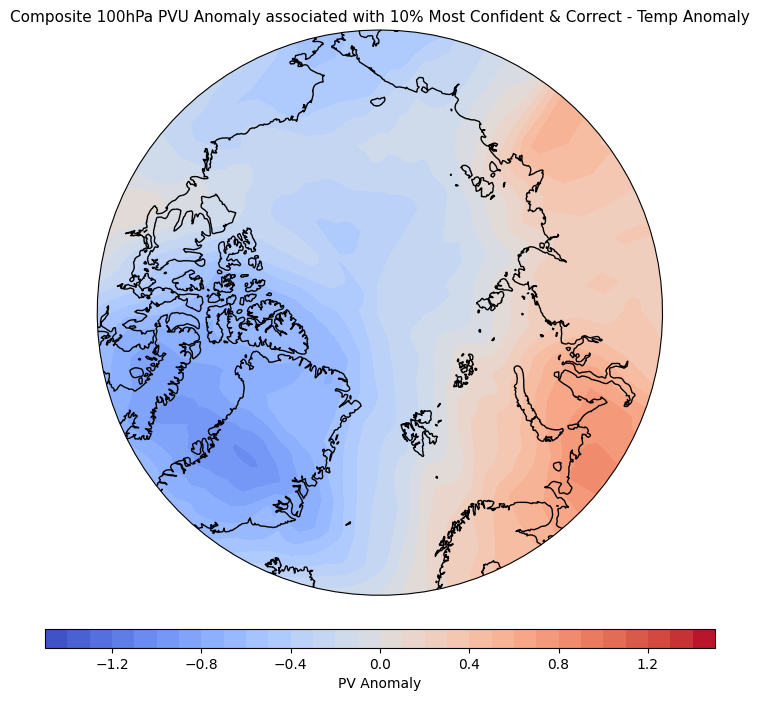

In [20]:
# plot the Correct Negative Composite
color = 'coolwarm' 
colorbarMin = -1.5
colorbarMax = 1.5
colorspace = 0.1
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats,np.nanmean(cneg,axis=0), level, transform=ccrs.PlateCarree(), cmap=color)
plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="PV Anomaly")

plt.tight_layout()
title = 'Composite 100hPa PVU Anomaly associated with 10% Most Confident & Correct - Temp Anomaly'
plt.title(title,fontsize=11)
plt.savefig("1204_N_PVU100_lag.png", bbox_inches='tight', dpi = 150)
plt.show()

<Figure size 750x750 with 0 Axes>

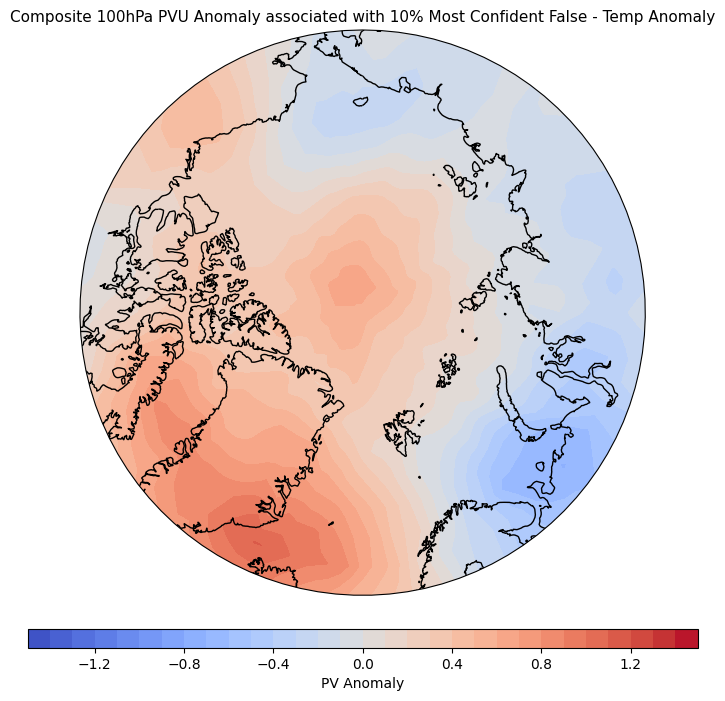

In [21]:
# plot the False Negative Composite
color = 'coolwarm' 
colorbarMin = -1.5
colorbarMax = 1.5
colorspace = 0.1
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats,np.nanmean(cFneg,axis=0), level, transform=ccrs.PlateCarree(), cmap=color)
plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="PV Anomaly")

plt.tight_layout()
title = 'Composite 100hPa PVU Anomaly associated with 10% Most Confident False - Temp Anomaly'
plt.title(title,fontsize=11)
plt.savefig("1204_FN_PVU100_lag.png", bbox_inches='tight', dpi = 150)
plt.show()

<Figure size 750x750 with 0 Axes>

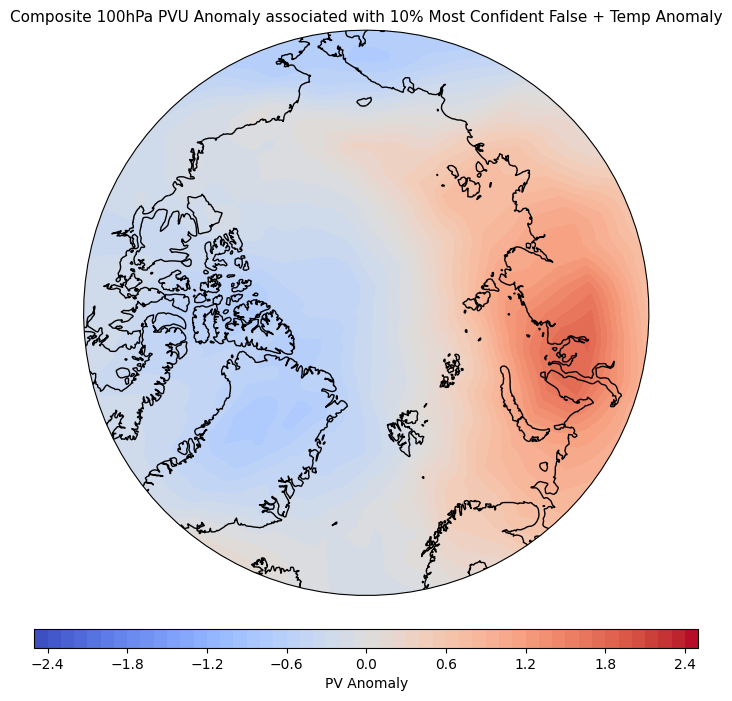

In [25]:
# plot the False Positive Composite
color = 'coolwarm' 
colorbarMin = -2.5
colorbarMax = 2.5
colorspace = 0.1
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats,np.nanmean(cFpos,axis=0),level, transform=ccrs.PlateCarree(), cmap=color)
plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="PV Anomaly")

plt.tight_layout()
title = 'Composite 100hPa PVU Anomaly associated with 10% Most Confident False + Temp Anomaly'
plt.title(title,fontsize=11)
plt.savefig("1204_FP_PVU100_lag.png", bbox_inches='tight', dpi = 150)
plt.show()

<Figure size 750x750 with 0 Axes>

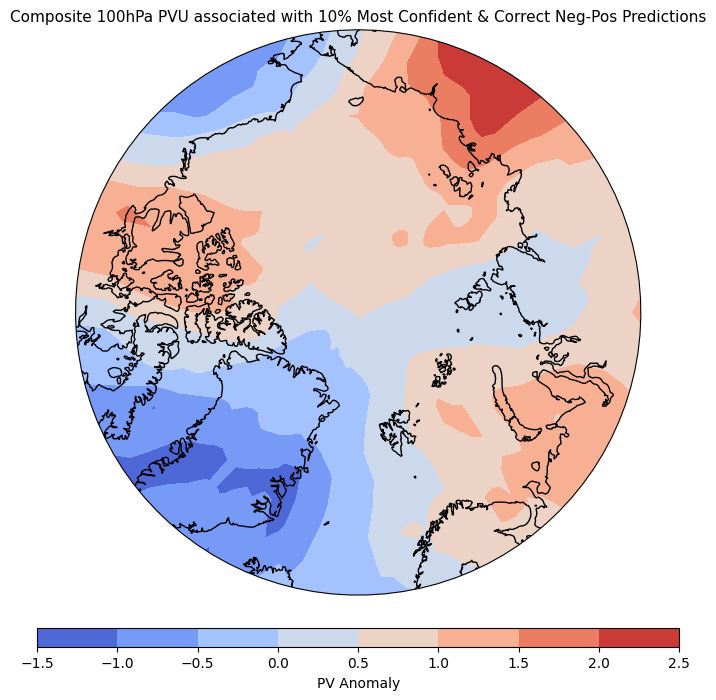

In [66]:
# plot the Pos-Neg Composite
color = 'coolwarm' 
#colorbarMin = -75
#colorbarMax = 75
#colorspace = 0.1
#level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
plt.figure(figsize=(7.5,7.5))
def define_map():
    from matplotlib.path import Path

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)
    

fig, ax = define_map()
plt.contourf(lons,lats,np.nanmean(pos_neg,axis=0),transform=ccrs.PlateCarree(), cmap=color)
plt.colorbar(orientation = 'horizontal', shrink=1,fraction=0.1,pad=0.05,aspect=35, label="PV Anomaly")

plt.tight_layout()
title = 'Composite 100hPa PVU associated with 10% Most Confident & Correct Neg-Pos Predictions'
plt.title(title,fontsize=11)
plt.savefig("1202_PN_PVU100_lag.png", bbox_inches='tight', dpi = 150)
plt.show()